<a href="https://colab.research.google.com/github/AmeerMohammadJafari/TensorFlow-and-Keras-mini-projects/blob/main/%E2%80%8C04_Boston_housing_price/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [5]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [7]:
train_labels.shape

(404,)

Normalizing data

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data = (test_data - mean) / std

In [12]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae']
    )
    return model

Using k-fold validation

In [10]:
import numpy as np

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'Fold #{i + 1}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]],
                                        axis=0
    )
    partial_train_labels = np.concatenate([
        train_labels[:i * num_val_samples],
        train_labels[(i+1) * num_val_samples:]],
                                        axis=0
    )
    model = build_model()
    model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=16)
    val_mse, val_mae = model.evaluate(val_data, val_labels)
    all_scores.append(val_mae)

Fold #1
Epoch 1/100
19/19 [==============================] - 1s 4ms/step - loss: 540.6577 - mae: 21.3851
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 432.6532 - mae: 18.7202
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 307.9634 - mae: 15.2975
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 186.8254 - mae: 11.3003
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 103.1038 - mae: 8.1400
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 63.5327 - mae: 6.1314
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 44.0528 - mae: 4.9563
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 33.4050 - mae: 4.2014
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 27.9663 - mae: 3.8259
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 24.4434 - mae: 3.4997
Epoch 11/100
19/19 [============

In [14]:
np.mean(all_scores)

2.3706526458263397

In [16]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'Fold #{i + 1}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]],
                                        axis=0
    )
    partial_train_labels = np.concatenate([
        train_labels[:i * num_val_samples],
        train_labels[(i+1) * num_val_samples:]],
                                        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=16,
                        validation_data=(val_data, val_labels))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Fold #1
Epoch 1/500
19/19 [==============================] - 1s 12ms/step - loss: 517.5995 - mae: 20.8487 - val_loss: 434.0023 - val_mae: 18.4564
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 393.2819 - mae: 17.7355 - val_loss: 295.2587 - val_mae: 14.7425
Epoch 3/500
19/19 [==============================] - 0s 5ms/step - loss: 258.1003 - mae: 13.8919 - val_loss: 165.3986 - val_mae: 10.4429
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 148.1307 - mae: 9.9435 - val_loss: 87.0746 - val_mae: 7.3421
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 85.2737 - mae: 7.4222 - val_loss: 56.0107 - val_mae: 5.6654
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 57.4095 - mae: 5.9169 - val_loss: 41.7582 - val_mae: 4.7108
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 41.0563 - mae: 4.9232 - val_loss: 32.4217 - val_mae: 3.8941
Epoch 8/500
19/19 [============================

In [26]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [29]:
len(average_mae_history)

500

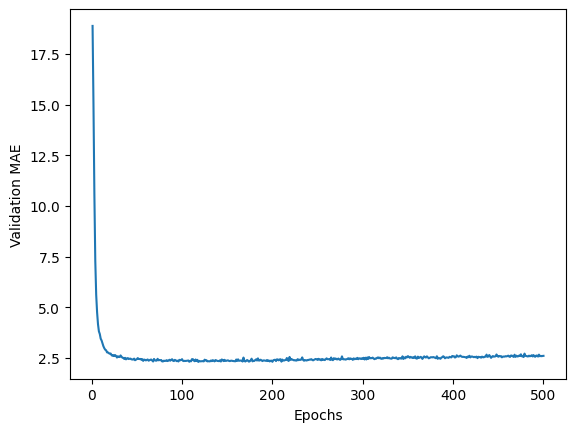

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')
plt.show()

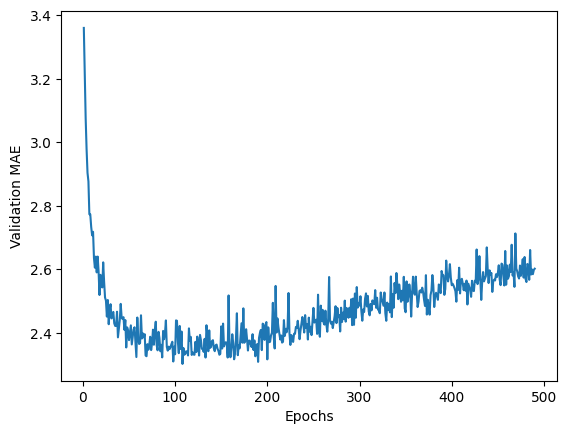

In [32]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')
plt.show()

In [33]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 4ms/step


In [36]:
predictions.shape, test_labels.shape

((102, 1), (102,))

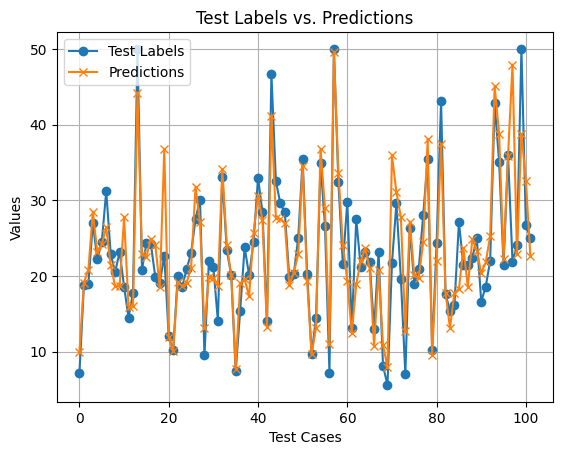

In [39]:
test_cases = np.arange(len(test_labels))
plt.plot(test_cases, test_labels, label='Test Labels', marker='o')
plt.plot(test_cases, predictions, label='Predictions', marker='x')

plt.xlabel('Test Cases')
plt.ylabel('Values')
plt.title('Test Labels vs. Predictions')
plt.legend()
plt.grid(True)

plt.show()